### Задание 
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1.Подключаем датасет
iris = load_iris(as_frame=True)
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# 2.Оставим только sepal_length и sepal_width... 
data = iris.data[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [4]:
# ...и целевую переменную - variety
variety = iris.target
variety

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [5]:
# 3.Разделим данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, variety, test_size=0.25, random_state=42)

In [6]:
# 4.Строим модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
y_pred = lda.predict(x_test)

# точность модели
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.868421052631579

In [7]:
# центры классов
lda.means_

array([[4.99714286, 3.42857143],
       [5.88717949, 2.75128205],
       [6.53947368, 2.97894737]])

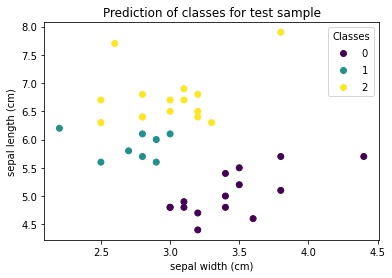

In [8]:
# 5.Визуализация предсказания для тестовой выборки...
test_sample = plt.scatter(x_test['sepal width (cm)'], x_test['sepal length (cm)'], c=y_pred)
plt.title('Prediction of classes for test sample')
plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')
plt.legend(*test_sample.legend_elements(), title='Classes')

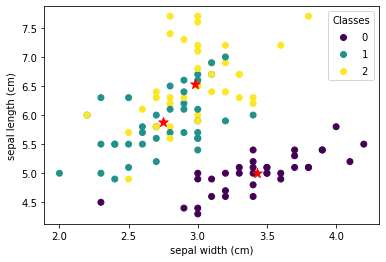

In [19]:
# ...и центры классов - строим по тренировочным данным 
plt.scatter(x_train['sepal width (cm)'], x_train['sepal length (cm)'], c=y_train)

plt.scatter(lda.means_[:, 1], lda.means_[:, 0], c='red', s=100, marker='*')

plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')
plt.legend(*test_sample.legend_elements(), title='Classes')

Видим, что по 1й и 2ой классы сильно пересекаются по показателям ширины и длины чашелистика. Возможно различия классов становятся более очевидными при включении показателей ширины и длины лепестков.

Text(0, 0.5, 'sepal length (cm)')

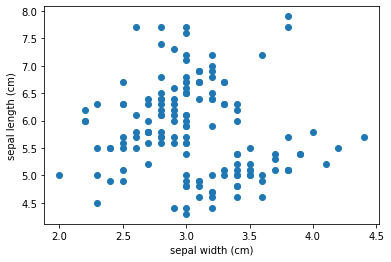

In [9]:
# 6.Оставим только два признака - sepal_length и sepal_width
plt.scatter(data['sepal width (cm)'], data['sepal length (cm)'])
plt.xlabel('sepal width (cm)')
plt.ylabel('sepal length (cm)')

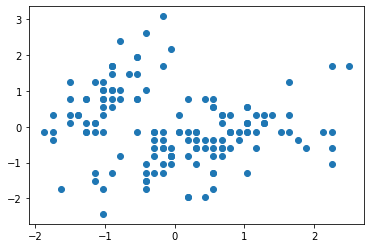

In [10]:
# отмасштабируем данные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data)

plt.scatter(x_scaled[:, 0], x_scaled[:, 1])

In [11]:
# 7.Подбираем оптимальное число кластеров для алгоритма kmeans
from sklearn.cluster import KMeans

# 2 кластера
kmeans_2 = KMeans(n_clusters=2)
clusters_2 = kmeans_2.fit_predict(x_scaled)

# 3 кластера
kmeans_3 = KMeans(n_clusters=3)
clusters_3 = kmeans_3.fit_predict(x_scaled)

# 4 кластера
kmeans_4 = KMeans(n_clusters=4)
clusters_4 = kmeans_4.fit_predict(x_scaled)

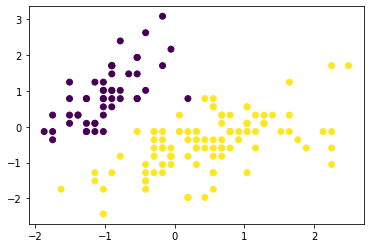

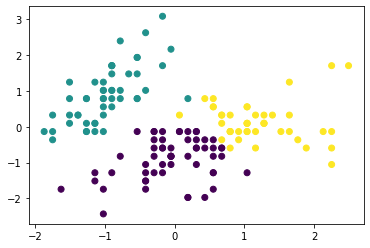

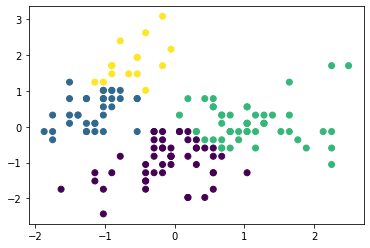

In [12]:
# визуализируем полученную кластеризацию
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters_2) # 2 clusters
plt.show()

plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters_3) # 3 clusters
plt.show()

plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters_4) # 4 clusters
plt.show()

Визуально кажется, что оптимальная картина - это 2 кластера.